### Part I Introduction

### About the data
 1. To study on this project, we have collected the primary data of vallabh vidyanagar ,Anand . we     firstly
    selected vallabh vidyanagar as prime location and then have sub location as nanabazar , motabazar
    ,bakrol gate & karamsad road.
 2. Columns:
    - Price:Price of the to be sold
    - Society:Name of the society
    - location:In which area society is located
    - OverallCondition:Condition of the house.
     OverallCond: Rates the overall condition of the house

       10--	Very Excellent,
       9--	Excellent,
       8--	Very Good,
       7--	Good,
       6--	Above Average,	
       5--	Average,
       4--	Below Average,	
       3--	Fair,
       2--	Poor,
       1--	Very Poor
    - YearBuilt:In which year house is built.
    - area sqrtft:Squarefoot of living in the area.
    - type of house:Which type of house is available(for e.g.2bhk,3bhk etc.)
    
    

### Goal
- Here our goal is to predict the price of house(dependent variable) located in vallabh vidyanagar,
  with the help of other essential features(independent variable) available in our dataset. The predictive analysis using supervise learning is used for effective prediction and cost evaluated
   on the area type, locality, availability of facilities etc.

### Part II Data Assessment

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

#### Check out the data

In [2]:
data=pd.read_excel("C:\\Users\\hp\\Desktop\\Roll no.20&30\\project.xlsx")
data.head()

,Id,area type,society,location,OverallCond,YearBuilt,area sqrtft,type of house,price
0,maruti1,carpet area,maruti,arvind marg,9,2019,684,2 bhk,25.0
1,maruti2,carpet area,maruti,arvind marg,9,2019,450,1 bhk,17.0
2,maruti1,carpet area,maruti,arvind marg,9,2019,1364,3 bhk,40.0
3,maruti1,carpet area,maruti,arvind marg,9,2019,200,1 shop,25.0
4,ramkunj1,carpet area,ram kunj,arvind marg,8,2017,850,2 bhk,25.0


#### Check Missing Data

In [3]:
data.isnull().sum()

Id               12
area type         0
society           0
location          0
OverallCond       0
YearBuilt         0
area sqrtft       0
type of house     0
price             0
dtype: int64

we can see here only 12 rows are nan in Id column.Now we will drop Id because
Id column is not useful in modeling.

#### Calculating Statistics
We will start with calculating some descriptive statistics about this house data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             35 non-null     object 
 1   area type      47 non-null     object 
 2   society        47 non-null     object 
 3   location       47 non-null     object 
 4   OverallCond    47 non-null     int64  
 5   YearBuilt      47 non-null     int64  
 6   area sqrtft    47 non-null     int64  
 7   type of house  47 non-null     object 
 8   price          47 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.4+ KB


In [5]:
data.columns

Index(['Id', 'area type', 'society', 'location', 'OverallCond', 'YearBuilt',
       'area sqrtft', 'type of house', 'price'],
      dtype='object')

In [6]:
data.shape

(47, 9)

In [7]:
data['location'].unique()

array(['arvind marg', 'sahid chowk', 'harinagar road', 'kisan market',
       'bakrol road', 'bakrol gate', 'rajender marg', 'nagar palika road'],
      dtype=object)

In [8]:
data['location'].value_counts()

rajender marg        8
arvind marg          7
sahid chowk          6
kisan market         6
bakrol road          5
harinagar road       5
nagar palika road    5
bakrol gate          5
Name: location, dtype: int64

In [9]:
data.describe()

,OverallCond,YearBuilt,area sqrtft,price
count,47.000000,47.000000,47.000000,47.000000
mean,8.021277,2010.702128,782.595745,22.441702
std,0.820640,7.629790,344.923600,8.744207
min,6.000000,1995.000000,200.000000,8.000000
25%,8.000000,2005.000000,510.000000,15.000000
50%,8.000000,2010.000000,750.000000,22.000000
75%,9.000000,2018.000000,900.000000,28.000000
max,9.000000,2020.000000,1500.000000,45.000000


To get better understanding about this dataset, I summaried all importabt variables in terms of minimum, first quartile, median, mean, third quantile and maximum value.

In [10]:
data['price'].describe()

count    47.000000
mean     22.441702
std       8.744207
min       8.000000
25%      15.000000
50%      22.000000
75%      28.000000
max      45.000000
Name: price, dtype: float64

In [11]:
data['area sqrtft'].describe()

count      47.000000
mean      782.595745
std       344.923600
min       200.000000
25%       510.000000
50%       750.000000
75%       900.000000
max      1500.000000
Name: area sqrtft, dtype: float64

#### Data Cleaning 

In [12]:
data['bhk']=data['type of house'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
data.head()

,Id,area type,society,location,OverallCond,YearBuilt,area sqrtft,type of house,price,bhk
0,maruti1,carpet area,maruti,arvind marg,9,2019,684,2 bhk,25.0,2
1,maruti2,carpet area,maruti,arvind marg,9,2019,450,1 bhk,17.0,1
2,maruti1,carpet area,maruti,arvind marg,9,2019,1364,3 bhk,40.0,3
3,maruti1,carpet area,maruti,arvind marg,9,2019,200,1 shop,25.0,1
4,ramkunj1,carpet area,ram kunj,arvind marg,8,2017,850,2 bhk,25.0,2


In [14]:
data['age of building']=2020-data['YearBuilt']

In [15]:
data.head()

,Id,area type,society,location,OverallCond,YearBuilt,area sqrtft,type of house,price,bhk,age of building
0,maruti1,carpet area,maruti,arvind marg,9,2019,684,2 bhk,25.0,2,1
1,maruti2,carpet area,maruti,arvind marg,9,2019,450,1 bhk,17.0,1,1
2,maruti1,carpet area,maruti,arvind marg,9,2019,1364,3 bhk,40.0,3,1
3,maruti1,carpet area,maruti,arvind marg,9,2019,200,1 shop,25.0,1,1
4,ramkunj1,carpet area,ram kunj,arvind marg,8,2017,850,2 bhk,25.0,2,3


In [16]:
df1=data.drop(['Id','area type','society','YearBuilt','type of house'],axis=1)
df1.head()


,location,OverallCond,area sqrtft,price,bhk,age of building
0,arvind marg,9,684,25.0,2,1
1,arvind marg,9,450,17.0,1,1
2,arvind marg,9,1364,40.0,3,1
3,arvind marg,9,200,25.0,1,1
4,arvind marg,8,850,25.0,2,3


we droped columns(Id,areatype,society) because these are not useful in prediction and 
we also dropped YearBuilt and type of house because we already convert these two variable by
bhk and age of building.

#### exploratory analysis of SalePrice

SalePrice is our target variable and also the dependent variable for prediction. According to the assumptions of Linear Regression, data should be normally distributed. By checking the distribution of SalePrice, we can decide if we need non-linear transformation, like log term, to make better prediction.

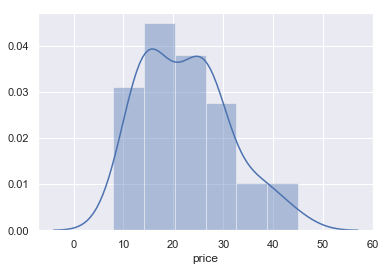

In [17]:
### Lets check the outlier
import seaborn as sns
sns.distplot(df1['price'])

Text(0.5, 1.0, 'Box plot')

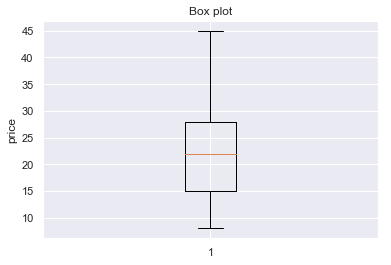

In [18]:
plt.boxplot(df1.price)
plt.ylabel('price')
plt.title("Box plot")

##### From above it is clear that there is no outlier but this is not true lets see why

In [19]:
df2=df1.copy()
df2['price_per_srqft']=df2['price']*100000/df2['area sqrtft']

In [20]:
df2.head()

,location,OverallCond,area sqrtft,price,bhk,age of building,price_per_srqft
0,arvind marg,9,684,25.0,2,1,3654.970760
1,arvind marg,9,450,17.0,1,1,3777.777778
2,arvind marg,9,1364,40.0,3,1,2932.551320
3,arvind marg,9,200,25.0,1,1,12500.000000
4,arvind marg,8,850,25.0,2,3,2941.176471


In [21]:
df2.describe()

,OverallCond,area sqrtft,price,bhk,age of building,price_per_srqft
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,8.021277,782.595745,22.441702,1.978723,9.297872,3313.962848
std,0.820640,344.923600,8.744207,0.706780,7.629790,2163.663013
min,6.000000,200.000000,8.000000,1.000000,0.000000,1200.000000
25%,8.000000,510.000000,15.000000,1.500000,2.000000,2422.222222
50%,8.000000,750.000000,22.000000,2.000000,10.000000,2888.888889
75%,9.000000,900.000000,28.000000,2.000000,15.000000,3298.368298
max,9.000000,1500.000000,45.000000,3.000000,25.000000,12500.000000


##### In above if we see the table of descriptive statistics,in which price_per_srqft the difference betweenQ3 and max are huge.it seems to be a outlier.

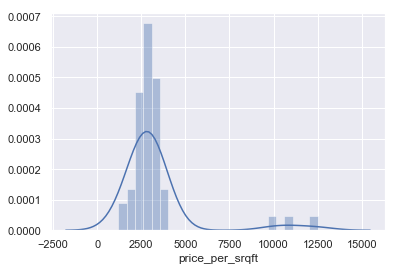

In [22]:
sns.distplot(df2['price_per_srqft'])

Text(0.5, 1.0, 'Box plot')

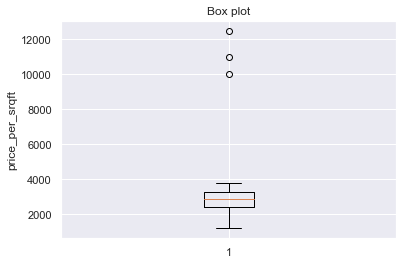

In [23]:
plt.boxplot(df2.price_per_srqft)
plt.ylabel('price_per_srqft')
plt.title("Box plot")

##### In above histogram some outlier is present

##### let's remove all those rows that price_per_srqft>4000

In [24]:
df2[df2['price_per_srqft']>=4000]

,location,OverallCond,area sqrtft,price,bhk,age of building,price_per_srqft
3,arvind marg,9,200,25.0,1,1,12500.0
12,sahid chowk,8,200,22.0,1,3,11000.0
15,harinagar road,7,200,20.0,1,20,10000.0


In [25]:
df3=df2.drop([3,12,15],axis=0)
df3.head()

,location,OverallCond,area sqrtft,price,bhk,age of building,price_per_srqft
0,arvind marg,9,684,25.0,2,1,3654.970760
1,arvind marg,9,450,17.0,1,1,3777.777778
2,arvind marg,9,1364,40.0,3,1,2932.551320
4,arvind marg,8,850,25.0,2,3,2941.176471
5,arvind marg,8,900,30.0,2,3,3333.333333


In [26]:
df3.shape

(44, 7)

In [27]:
df3.describe()

,OverallCond,area sqrtft,price,bhk,age of building,price_per_srqft
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,8.022727,822.318182,22.449091,2.045455,9.386364,2778.551224
std,0.820908,319.339636,9.027746,0.680443,7.555118,582.123337
min,6.000000,400.000000,8.000000,1.000000,0.000000,1200.000000
25%,8.000000,587.500000,15.000000,2.000000,2.000000,2396.153846
50%,8.000000,750.000000,22.000000,2.000000,10.000000,2817.444877
75%,9.000000,925.000000,28.000000,2.250000,15.000000,3238.970588
max,9.000000,1500.000000,45.000000,3.000000,25.000000,3777.777778


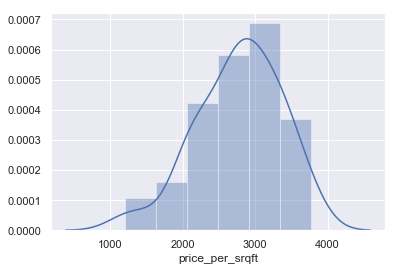

In [28]:
sns.distplot(df3['price_per_srqft'])

Text(0.5, 1.0, 'Box plot')

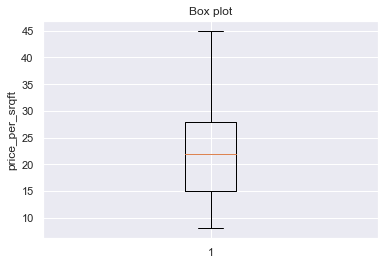

In [29]:
plt.boxplot(df3.price)
plt.ylabel('price_per_srqft')
plt.title("Box plot")

In [30]:
df3['price_per_srqft'].describe()

count      44.000000
mean     2778.551224
std       582.123337
min      1200.000000
25%      2396.153846
50%      2817.444877
75%      3238.970588
max      3777.777778
Name: price_per_srqft, dtype: float64

#### Correlation matrix

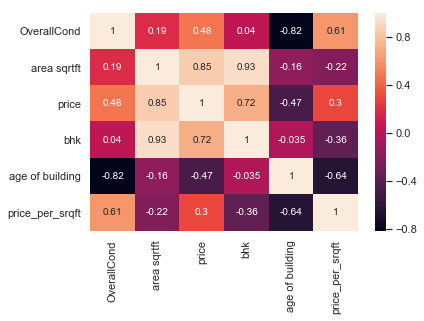

In [31]:
sns.heatmap(df3.corr(),annot=True)

##### In above correlation matrix price is inversely correlated with age of building and directly correlated with remaing feature.

#### 1.Scatter plot

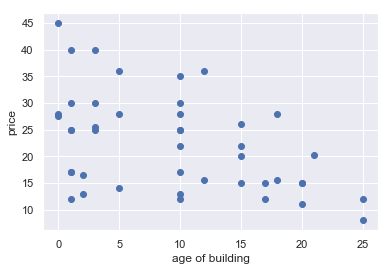

In [32]:
from matplotlib import pyplot as plt

plt.scatter(df3['age of building'],df3['price'])
plt.xlabel("age of building")
plt.ylabel("price");

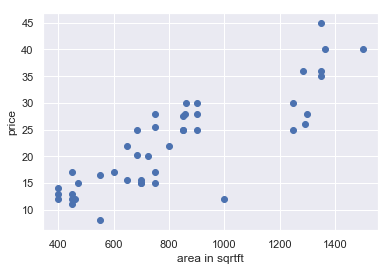

In [33]:
plt.scatter(df3['area sqrtft'],df3['price'])
plt.xlabel("area in sqrtft")
plt.ylabel("price");

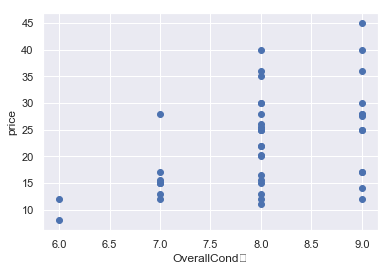

In [34]:
plt.scatter(df3['OverallCond'],df3['price'])
plt.xlabel("OverallCond	")
plt.ylabel("price");

In [35]:
df4=df3.groupby('bhk',as_index=False).agg({"price": "mean"})
df4

,bhk,price
0,1,13.222222
1,2,21.490000
2,3,32.090909


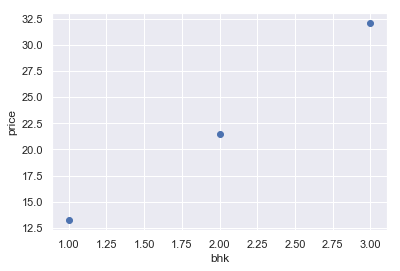

In [36]:
plt.scatter(df4['bhk'],df4['price'])
plt.xlabel("bhk")
plt.ylabel("price");

##### From above two it is clear that data is linear. 

By seeing above scatter plot we can say that all independent variables have some relation between dependent variable 

#### 2.Histogram or Distribution plot


Histogram to check the normality of data by graphically

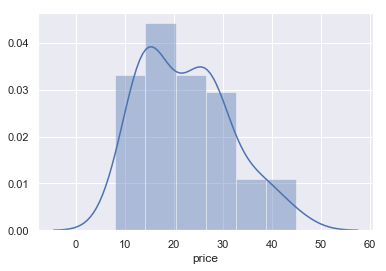

In [37]:
sns.distplot(df3['price'])

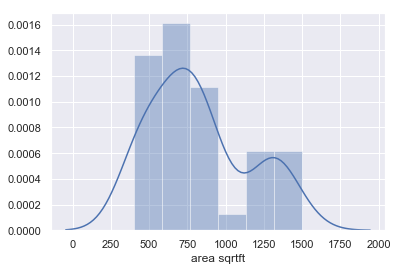

In [38]:
sns.distplot(df3['area sqrtft'])

#### We can also check normality by using NPP or Q-Q plot

In [39]:
from scipy import stats
import scipy as scipy
import numpy as np
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

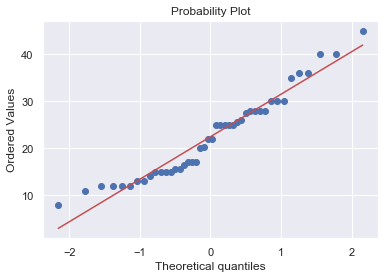

<Figure size 432x288 with 0 Axes>

In [40]:
stats.probplot(df3.price,plot=plt)
plt.figure()

<Figure size 432x288 with 0 Axes>

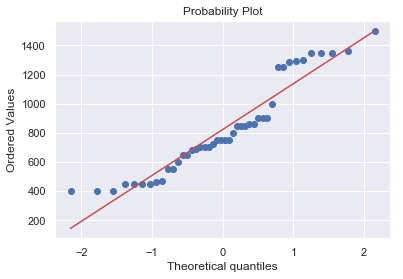

<Figure size 432x288 with 0 Axes>

In [41]:
stats.probplot(df3['area sqrtft'],plot=plt)
plt.figure()

<Figure size 432x288 with 0 Axes>

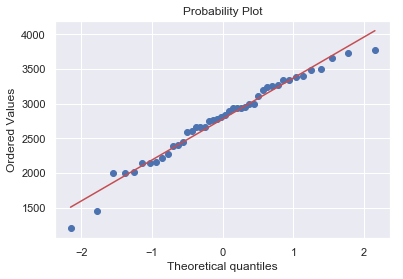

<Figure size 432x288 with 0 Axes>

In [42]:
stats.probplot(df3.price_per_srqft,plot=plt)
plt.figure()

By seeing above  plot we can say that all independent variables and dependent variable are normal.

#### 3.Multicolinearity¶

In [43]:
df4=df3.drop(['price_per_srqft'],axis=1)
df4.head()

,location,OverallCond,area sqrtft,price,bhk,age of building
0,arvind marg,9,684,25.0,2,1
1,arvind marg,9,450,17.0,1,1
2,arvind marg,9,1364,40.0,3,1
4,arvind marg,8,850,25.0,2,3
5,arvind marg,8,900,30.0,2,3


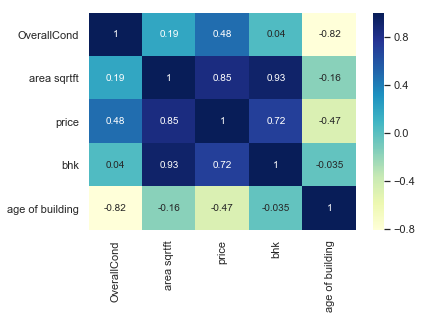

In [44]:
#1.correlation matrix
## Data visualization and building the correlation matrix
sns.heatmap(df4.corr(),cmap="YlGnBu",annot=True)

#### In above correlation matrix price is inversely correlated with age of building and directly correlated with remaining feature.

### Part III Handling categorical feature

In [45]:
d=pd.get_dummies(df4.location)

In [46]:
d.head()

,arvind marg,bakrol gate,bakrol road,harinagar road,kisan market,nagar palika road,rajender marg,sahid chowk
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0


In [47]:
df5=pd.concat([df4,d.drop("sahid chowk",axis=1)],axis=1)
df5.head()

,location,OverallCond,area sqrtft,price,bhk,age of building,arvind marg,bakrol gate,bakrol road,harinagar road,kisan market,nagar palika road,rajender marg
0,arvind marg,9,684,25.0,2,1,1,0,0,0,0,0,0
1,arvind marg,9,450,17.0,1,1,1,0,0,0,0,0,0
2,arvind marg,9,1364,40.0,3,1,1,0,0,0,0,0,0
4,arvind marg,8,850,25.0,2,3,1,0,0,0,0,0,0
5,arvind marg,8,900,30.0,2,3,1,0,0,0,0,0,0


In [48]:
df6=df5.drop(['location'],axis=1)
df6.head()

,OverallCond,area sqrtft,price,bhk,age of building,arvind marg,bakrol gate,bakrol road,harinagar road,kisan market,nagar palika road,rajender marg
0,9,684,25.0,2,1,1,0,0,0,0,0,0
1,9,450,17.0,1,1,1,0,0,0,0,0,0
2,9,1364,40.0,3,1,1,0,0,0,0,0,0
4,8,850,25.0,2,3,1,0,0,0,0,0,0
5,8,900,30.0,2,3,1,0,0,0,0,0,0


#### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()
df_scaler=scaler.fit_transform(df6)
df_scaler

array([[ 1.20424087, -0.4381457 ,  0.28582997, -0.06757374, -1.12285724,
         2.51661148, -0.35805744, -0.35805744, -0.31622777, -0.39735971,
        -0.35805744, -0.47140452],
       [ 1.20424087, -1.17937938, -0.61057192, -1.55419597, -1.12285724,
         2.51661148, -0.35805744, -0.35805744, -0.31622777, -0.39735971,
        -0.35805744, -0.47140452],
       [ 1.20424087,  1.71586669,  1.96658351,  1.41904849, -1.12285724,
         2.51661148, -0.35805744, -0.35805744, -0.31622777, -0.39735971,
        -0.35805744, -0.47140452],
       [-0.0280056 ,  0.08768673,  0.28582997, -0.06757374, -0.85507556,
         2.51661148, -0.35805744, -0.35805744, -0.31622777, -0.39735971,
        -0.35805744, -0.47140452],
       [-0.0280056 ,  0.24607   ,  0.84608115, -0.06757374, -0.85507556,
         2.51661148, -0.35805744, -0.35805744, -0.31622777, -0.39735971,
        -0.35805744, -0.47140452],
       [ 1.20424087,  1.67151937,  2.52683468,  1.41904849, -1.25674807,
         2.51661148, -

In [51]:
df6.columns

Index(['OverallCond', 'area sqrtft', 'price', 'bhk', 'age of building',
       'arvind marg', 'bakrol gate', 'bakrol road', 'harinagar road',
       'kisan market', 'nagar palika road', 'rajender marg'],
      dtype='object')

In [52]:
df_scaler=pd.DataFrame(df_scaler,columns=['OverallCond','area sqrtft','price','bhk','age of building','arvind marg','bakrol gate','bakrol road','harinagar road','kisan market','nagar palika road','rajender marg'])
df_scaler

,OverallCond,area sqrtft,price,bhk,age of building,arvind marg,bakrol gate,bakrol road,harinagar road,kisan market,nagar palika road,rajender marg
0,1.204241,-0.438146,0.285830,-0.067574,-1.122857,2.516611,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
1,1.204241,-1.179379,-0.610572,-1.554196,-1.122857,2.516611,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
2,1.204241,1.715867,1.966584,1.419048,-1.122857,2.516611,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
3,-0.028006,0.087687,0.285830,-0.067574,-0.855076,2.516611,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
4,-0.028006,0.246070,0.846081,-0.067574,-0.855076,2.516611,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
5,1.204241,1.671519,2.526835,1.419048,-1.256748,2.516611,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
6,1.204241,-1.147703,-1.170823,-1.554196,-1.122857,-0.397360,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
7,1.204241,-0.229080,-0.610572,-0.067574,-1.122857,-0.397360,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
8,1.204241,1.354753,0.285830,1.419048,-1.122857,-0.397360,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405
9,-0.028006,-0.229080,0.342976,-0.067574,-0.855076,-0.397360,-0.358057,-0.358057,-0.316228,-0.397360,-0.358057,-0.471405


In [53]:
df_scaler.shape

(44, 12)

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.
The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.

So,by splitting dataset into training and testing subset, we can efficiently measure our trained model since it never sees testing data before.Thus it's possible to prevent overfitting.

I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.

In [54]:
y=df6['price']
x=df6.drop(['price'],axis=1)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

### Part IV Model Fitting

### 1.LinearRegression


Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

Try different preparations of your data using these heuristics and see what works best for your problem.

- Linear Assumption. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- Remove Noise. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [57]:
lr.intercept_

17.700029037747235

In [58]:
pred=lr.predict(x_test)
pred

array([21.67559385, 36.45983069, 34.46422629, 25.5179434 , 29.69351199,
       15.13993397, 18.84309747, 24.50958231, 40.06347606])

In [59]:
coeff_df = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
OverallCond,-1.470874
area sqrtft,0.025623
bhk,-2.200436
age of building,-0.435506
arvind marg,7.688245
bakrol gate,6.177553
bakrol road,0.113007
harinagar road,5.010745
kisan market,5.230979
nagar palika road,2.029110


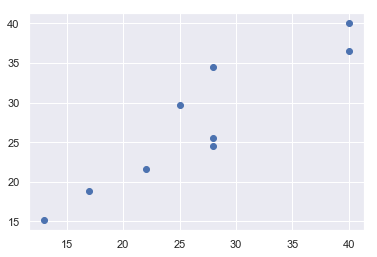

In [60]:
plt.scatter(y_test, pred)

#### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
n
∑(1/n)*|yi−y_pred|
i=1 
Mean Squared Error (MSE) is the mean of the squared errors:

n
∑(1/n)*(yi−y_pred)^2
i=1 
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
sqrt((1/n)*∑(yi−y_pred)^2)
 
Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
- All of these are loss functions, because we want to minimize them.



In [61]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [62]:
test_pred = lr.predict(x_test)
train_pred = lr.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 2.7823661697765134
MSE: 11.419698882003706
RMSE: 3.3793044967868324
R2 Square 0.8455766929144741
Train set evaluation:
_____________________________________
MAE: 2.1905025706485444
MSE: 7.693746361007907
RMSE: 2.7737603286888195
R2 Square 0.8974929117316708


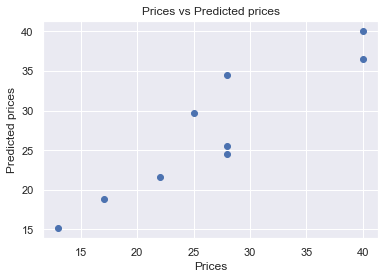

In [63]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

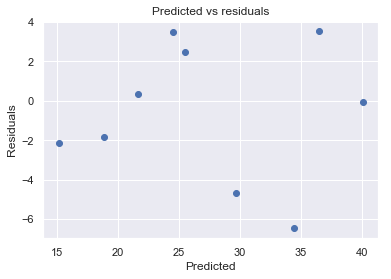

In [64]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

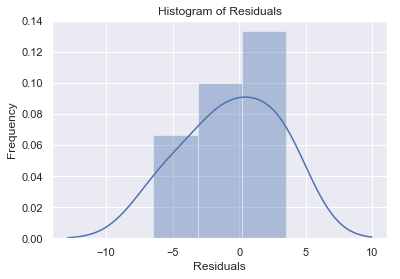

In [65]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [66]:
def predict_price(OverallCond,area,bhk,ageofbuilding,location):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = OverallCond
    X[1] = area
    X[2] = bhk
    X[3] = ageofbuilding
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

In [67]:
predict_price(9,684,2,0,'arvind marg')

25.275725726034377

In [68]:
lr.predict([[9,684,2,0,1,0,0,0,0,0,0]])

array([25.27572573])

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

score=cross_val_score(LinearRegression(), x, y, cv=cv)
score

array([0.79706516, 0.73700929, 0.75786989])

In [70]:
import numpy as np
np.mean(score)

0.7639814427096079

In [71]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.782366,11.419699,3.379304,0.845577


Here our data is working very well with respect to train and test.Train set evaluation:R2 Square 0.8974929117316708
and Test set evaluation:R2 Square 0.8455766929144741.we can see that the difference between train R2 test R2 is very low.

### 2.Support Vector Machine(SVM)

In [72]:

from sklearn.svm import SVR
svr=SVR(degree=2,kernel='linear')
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [73]:
svr.intercept_

array([1.27940149])

In [74]:
svr.coef_

array([[ 0.76436511,  0.02571232, -1.26954867, -0.31590877,  2.        ,
         0.06212269, -1.00333261, -0.47679245,  1.        , -0.67151506,
         0.08951744]])

In [75]:
pred=svr.predict(x_test)
pred

array([20.74857558, 41.20643647, 33.91473291, 26.19073795, 27.76297435,
       15.1063708 , 24.58792457, 25.90383334, 41.10574302])

In [76]:
test_pred = svr.predict(x_test)
train_pred = svr.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.871226138883465
MSE: 12.949228150819616
RMSE: 3.5985035988337732
R2 Square 0.8248935759238082
Train set evaluation:
_____________________________________
MAE: 2.224788885448431
MSE: 11.456404659795092
RMSE: 3.38473110598096
R2 Square 0.8473613986482564


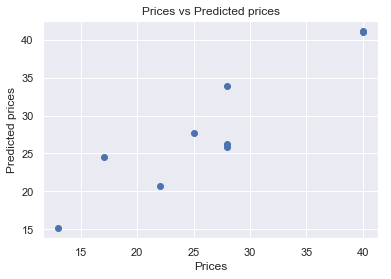

In [77]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

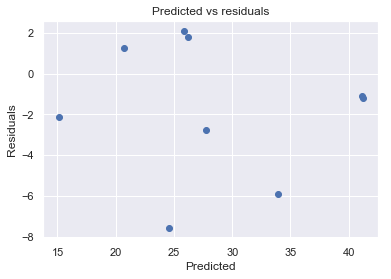

In [78]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

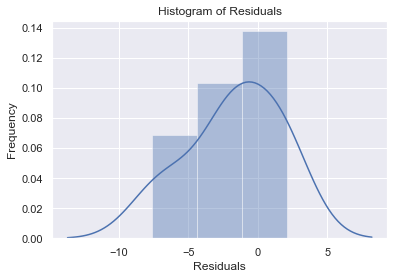

In [79]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [80]:
def predict_price(OverallCond,area,bhk,ageofbuilding,location):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = OverallCond
    X[1] = area
    X[2] = bhk
    X[3] = ageofbuilding
    if loc_index >= 0:
        X[loc_index] = 1

    return svr.predict([X])[0]

In [81]:
predict_price(9,684,2,0,'arvind marg')

25.206819933320983

In [82]:
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.782366,11.419699,3.379304,0.845577
1,Support Vector Machine,2.871226,12.949228,3.598504,0.824894


### Hyperparameter tunning 

In [83]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
                   }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)
 


,model,best_score,best_params
0,linear_regression,0.763902,{'normalize': True}
1,lasso,0.736687,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.684342,"{'criterion': 'mse', 'splitter': 'best'}"


### 3.Lasso

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients.The lasso coefficients minimize a penalized residual sum of squares.
A linear model that estimates sparse coefficients.

Mathematically, it consists of a linear model trained with  ℓ1  prior as regularizer. The objective function to minimize is:

min∑(yi-y_pred )^2+λ|m|

 


In [84]:

from sklearn.linear_model import Lasso
lr_lasso=Lasso(random_state=2,alpha=2.0,selection='cyclic')
lr_lasso.fit(x_train,y_train)


Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=2,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
lr_lasso.intercept_

7.736090221484883

In [86]:
pred=lr_lasso.predict(x_test)
pred

array([19.8920971 , 40.33334922, 33.09928201, 25.10017864, 25.70056007,
       15.96040624, 24.22983905, 24.6200777 , 38.05219679])

In [87]:
test_pred = lr_lasso.predict(x_test)
train_pred = lr_lasso.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.9620984837717574
MSE: 12.856576831523316
RMSE: 3.5856068986328267
R2 Square 0.8261464568692173
Train set evaluation:
_____________________________________
MAE: 2.7260527683671927
MSE: 13.339179370939574
RMSE: 3.652284130642025
R2 Square 0.8222763822662787


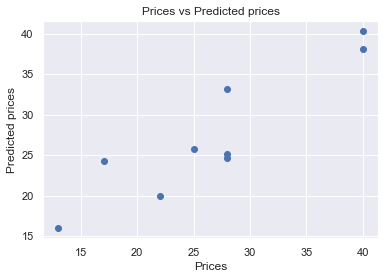

In [88]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

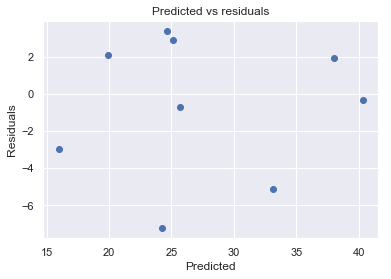

In [89]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

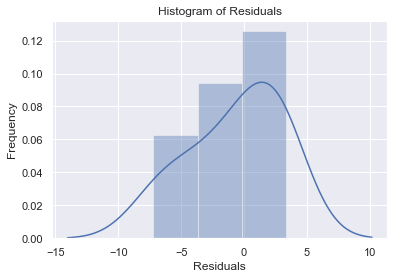

In [90]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [91]:
def predict_price(OverallCond,area,bhk,ageofbuilding,location):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = OverallCond
    X[1] = area
    X[2] = bhk
    X[3] = ageofbuilding
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_lasso.predict([X])[0]

In [92]:
predict_price(9,684,2,0,'arvind marg')

23.13428679804992

In [93]:
results_df_2 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square',])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.782366,11.419699,3.379304,0.845577
1,Support Vector Machine,2.871226,12.949228,3.598504,0.824894
2,Lasso,2.962098,12.856577,3.585607,0.826146


### 4.Ridge Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

min∑(yi-y_pred )^2+λ[mi^2]   where i=1,2,....,n and mi is the slope.

In [94]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)

pred = model.predict(x_test)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.9142324745969574
MSE: 12.698143679144913
RMSE: 3.5634454786266776
R2 Square 0.8282888751234161
Train set evaluation:
_____________________________________
MAE: 2.6631028257770346
MSE: 12.934488096302742
RMSE: 3.5964549345574652
R2 Square 0.8276682579876907


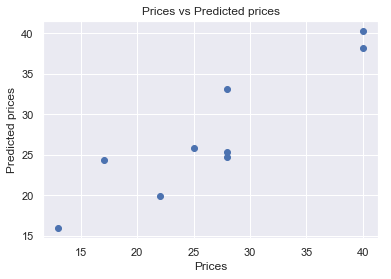

In [95]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

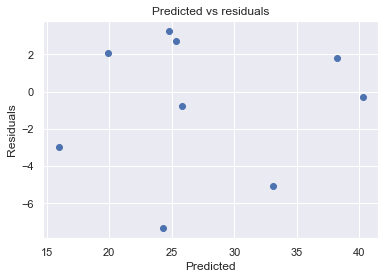

In [96]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

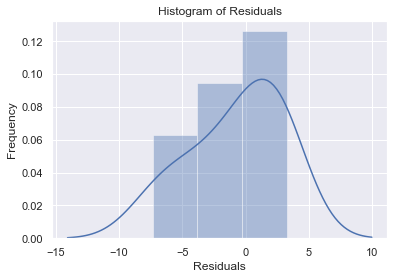

In [97]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [98]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.782366,11.419699,3.379304,0.845577
1,Support Vector Machine,2.871226,12.949228,3.598504,0.824894
2,Lasso,2.962098,12.856577,3.585607,0.826146
3,Ridge Regression,2.914232,12.698144,3.563445,0.828289


## Ensemble Learning

### 5. Bagging

In [99]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

In [100]:
bg=BaggingRegressor(tree.DecisionTreeRegressor(random_state=20))

In [101]:
bg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=20,
                                                      splitter='best'),
                 bootstrap=Tru

In [102]:
pred=bg.predict(x_test)
pred

array([21.178, 37.2  , 30.5  , 29.35 , 28.352, 13.85 , 24.456, 24.405,
       42.   ])

In [103]:
test_pred = bg.predict(x_test)
train_pred = bg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.747222222222222
MSE: 11.229172111111106
RMSE: 3.3509956895094786
R2 Square 0.848153098330551
Train set evaluation:
_____________________________________
MAE: 1.4286
MSE: 3.5975016857142865
RMSE: 1.8967081182180578
R2 Square 0.9520689394295724


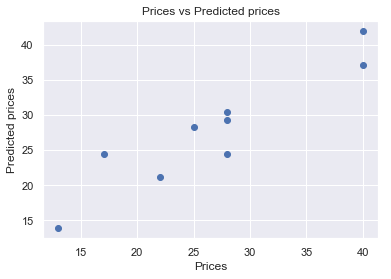

In [104]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

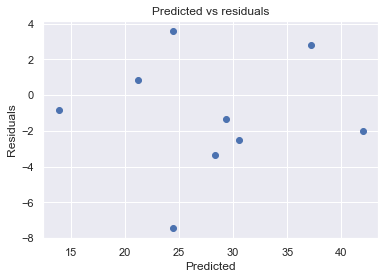

In [105]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

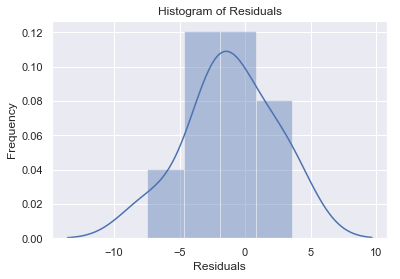

In [106]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [107]:
def predict_price(OverallCond,area,bhk,ageofbuilding,location):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = OverallCond
    X[1] = area
    X[2] = bhk
    X[3] = ageofbuilding
    if loc_index >= 0:
        X[loc_index] = 1

    return bg.predict([X])[0]

In [108]:
predict_price(9,684,2,0,'arvind marg')

23.55

In [109]:
#  lets try =model is not overfit 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

cross_val_score(bg, x, y, cv=cv)

array([0.7649708 , 0.81388056, 0.76718494])

In [110]:
results_df_2 = pd.DataFrame(data=[["Bagging", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.782366,11.419699,3.379304,0.845577
1,Support Vector Machine,2.871226,12.949228,3.598504,0.824894
2,Lasso,2.962098,12.856577,3.585607,0.826146
3,Ridge Regression,2.914232,12.698144,3.563445,0.828289
4,Bagging,2.747222,11.229172,3.350996,0.848153


### 6.Random forest

In [111]:
# 6.Random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,min_samples_split=2,min_samples_leaf=2,max_depth=780,max_features='auto',random_state=1)

In [112]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=780, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [113]:
print('Random Forest:',rfr.score(x_test,y_test))

Random Forest: 0.8514510702238111


In [114]:
pred=rfr.predict(x_test)

In [115]:
test_pred = rfr.predict(x_test)
train_pred = rfr.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.7005042283950633
MSE: 10.985285053819402
RMSE: 3.3144056863666225
R2 Square 0.8514510702238112
Train set evaluation:
_____________________________________
MAE: 1.9300817907647894
MSE: 7.388568718974037
RMSE: 2.7181921784476604
R2 Square 0.9015589245714011


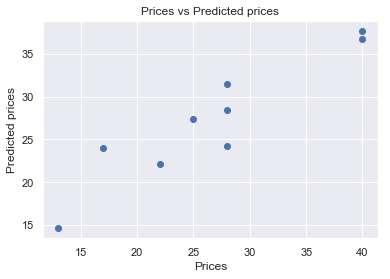

In [116]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

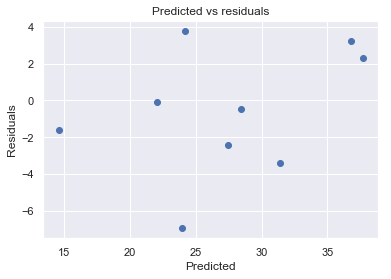

In [117]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

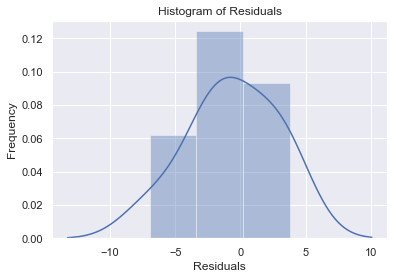

In [118]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

####  Hyperparameter tunning 

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rfr=RandomForestRegressor()

In [121]:
import warnings
warnings.filterwarnings('ignore')# we want to ignore warning

In [122]:

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [123]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [124]:
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [125]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 1000}

In [126]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=1000, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [127]:
test_pred = best_random_grid.predict(x_test)
train_pred = best_random_grid.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.882783834616019
MSE: 12.039249893332519
RMSE: 3.4697622243220816
R2 Square 0.8371987910918307
Train set evaluation:
_____________________________________
MAE: 2.0650270307153216
MSE: 8.389809125020802
RMSE: 2.896516722724176
R2 Square 0.8882189684739912


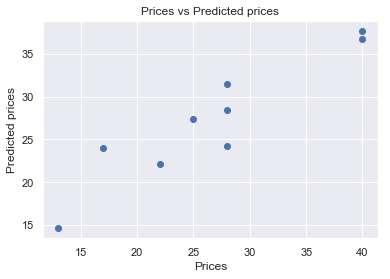

In [128]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

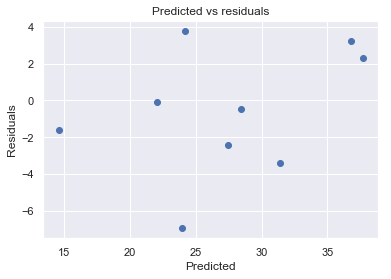

In [129]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

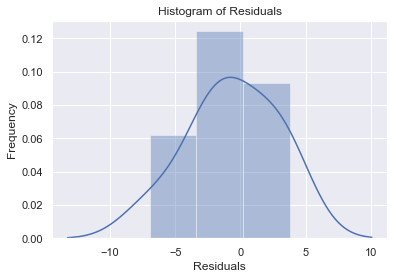

In [130]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [131]:
def predict_price(OverallCond,area,bhk,ageofbuilding,location):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = OverallCond
    X[1] = area
    X[2] = bhk
    X[3] = ageofbuilding
    if loc_index >= 0:
        X[loc_index] = 1

    return best_random_grid.predict([X])[0]

In [132]:
predict_price(9,684,2,0,'arvind marg')

21.534304768758986

In [133]:
results_df_2 = pd.DataFrame(data=[["Random Forest", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.782366,11.419699,3.379304,0.845577
1,Support Vector Machine,2.871226,12.949228,3.598504,0.824894
2,Lasso,2.962098,12.856577,3.585607,0.826146
3,Ridge Regression,2.914232,12.698144,3.563445,0.828289
4,Bagging,2.747222,11.229172,3.350996,0.848153
5,Random Forest,2.882784,12.039250,3.469762,0.837199


## Boosting

### 7. AdaBoost

In [134]:

from sklearn.ensemble import AdaBoostRegressor
adab=AdaBoostRegressor()

In [135]:
adab.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [136]:
pred=adab.predict(x_test)
pred

array([23.25      , 35.6       , 30.68181818, 27.25      , 27.14055556,
       14.671875  , 25.255     , 25.255     , 45.        ])

In [137]:
test_pred = adab.predict(x_test)
train_pred = adab.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.210472081930415
MSE: 15.192704762486152
RMSE: 3.897782031166719
R2 Square 0.7945560791717231
Train set evaluation:
_____________________________________
MAE: 1.3670514172335597
MSE: 2.597539117523418
RMSE: 1.611688281747875
R2 Square 0.9653918703442247


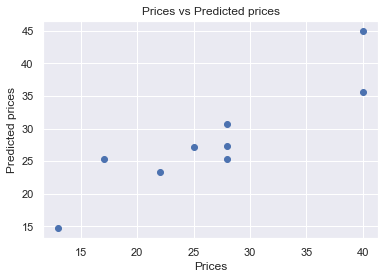

In [138]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

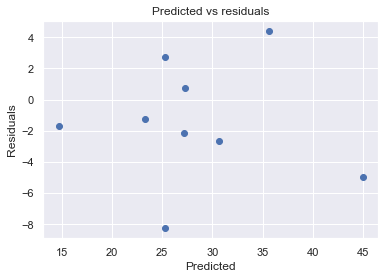

In [139]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

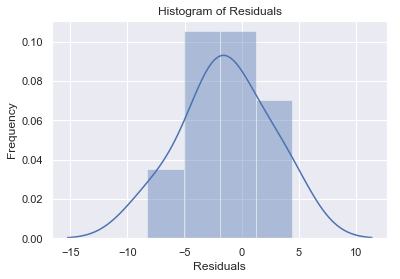

In [140]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [141]:
def predict_price(OverallCond,area,bhk,ageofbuilding,location):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = OverallCond
    X[1] = area
    X[2] = bhk
    X[3] = ageofbuilding
    if loc_index >= 0:
        X[loc_index] = 1

    return adab.predict([X])[0]

In [142]:
predict_price(9,684,2,0,'arvind marg')

23.982142857142858

In [143]:
results_df_2 = pd.DataFrame(data=[["Adaboost", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.782366,11.419699,3.379304,0.845577
1,Support Vector Machine,2.871226,12.949228,3.598504,0.824894
2,Lasso,2.962098,12.856577,3.585607,0.826146
3,Ridge Regression,2.914232,12.698144,3.563445,0.828289
4,Bagging,2.747222,11.229172,3.350996,0.848153
5,Random Forest,2.882784,12.039250,3.469762,0.837199
6,Adaboost,3.210472,15.192705,3.897782,0.794556


### 8.GradientBoosting

In [144]:

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [145]:
pred=gbr.predict(x_test)
pred

array([18.1513634 , 37.35688315, 30.76372438, 28.38539182, 29.54777362,
       14.2098971 , 24.07263301, 24.9220838 , 43.35434339])

In [146]:
est_pred = gbr.predict(x_test)
train_pred = gbr.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.210472081930415
MSE: 15.192704762486152
RMSE: 3.897782031166719
R2 Square 0.7945560791717231
Train set evaluation:
_____________________________________
MAE: 0.22039402856122678
MSE: 0.08054660193475044
RMSE: 0.28380733241893247
R2 Square 0.9989268430168059


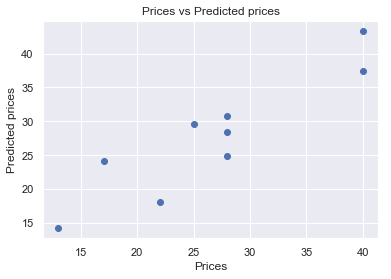

In [147]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

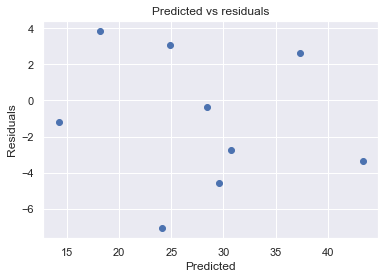

In [148]:
# Checking residuals
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

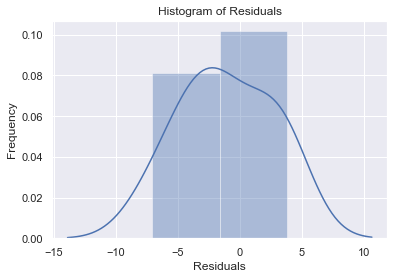

In [149]:
# Checking Normality of errors
sns.distplot(y_test-pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [150]:
def predict_price(OverallCond,area,bhk,ageofbuilding,location):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = OverallCond
    X[1] = area
    X[2] = bhk
    X[3] = ageofbuilding
    if loc_index >= 0:
        X[loc_index] = 1

    return gbr.predict([X])[0]

In [151]:
predict_price(9,684,2,0,'arvind marg')

25.23584490465953

In [152]:
results_df_2 = pd.DataFrame(data=[["GradientBoosting", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.782366,11.419699,3.379304,0.845577
1,Support Vector Machine,2.871226,12.949228,3.598504,0.824894
2,Lasso,2.962098,12.856577,3.585607,0.826146
3,Ridge Regression,2.914232,12.698144,3.563445,0.828289
4,Bagging,2.747222,11.229172,3.350996,0.848153
5,Random Forest,2.882784,12.039250,3.469762,0.837199
6,Adaboost,3.210472,15.192705,3.897782,0.794556
7,GradientBoosting,3.210472,15.192705,3.897782,0.794556


### Models Comparison

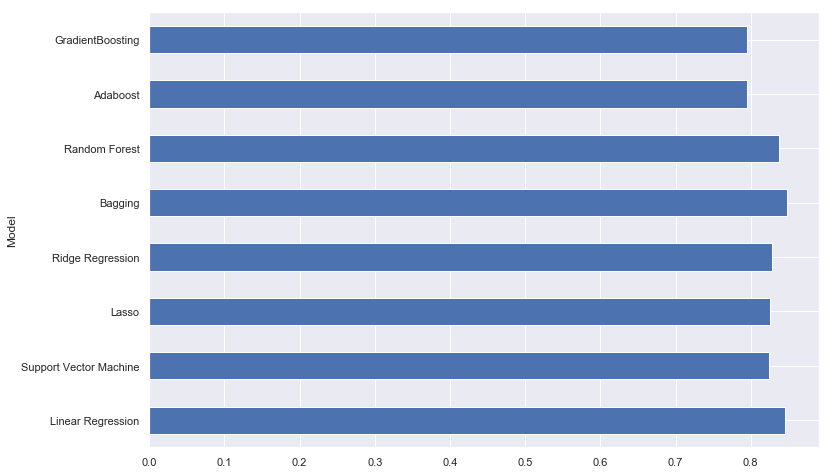

In [153]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

### Conclusion


when we look at the model accurcy table Bagging,Linear model,Random forest is working very well.In which Bagging is 
working very well if we compare with all other models.Bagging have 0.871260 accuracy,it means almost 
87% values are predicted well.
We have built our model on very small dataset,if we increase this dataset accuracy will be increase.


### References:

###### https://scikit-learn.org/stable/supervised_learning.html#supervised-learning